Дополнительное задание по курсу Методы математической статистики

В файле даны замеры забойного давления на 2 скважинах. Можно ли с надежностью 95% утверждать, что давления можно считать равными, отличия статистически не значимы?

Необходимо сформулировать нулевую и альтернативную гипотезу, вычислить критическое значение для критерия Стьюдента и р-значение, сделать вывод

Вариант

    1 МУСИЕНКО ВАДИМ

    2 ВУКИЧЕВИЧ СТЕФАН

    3 ОРУДЖЕВ АЛИ

    4 ТРАМОВ АДИЛ

Загружаем необходимые библиотеки

In [52]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

С помощью процедуры read_excel считыем данные о замерах забойного давления на 2 скважинах из документа proverka_gipotez.xlsx

In [7]:
df = pd.read_excel('proverka_gipotez.xlsx')

Выведим данные

In [8]:
df

,P1,P2
0,120.714431,119.430196
1,121.301441,120.844523
2,114.796815,118.417013
3,113.098356,118.430678
4,105.596151,125.124298
5,128.095844,125.067716
6,123.306354,115.930682
7,131.664451,121.803357
8,122.421791,113.299014
9,115.164012,125.104289


Построим две гистограммы для P1 и P2

In [9]:
x = df['P1']
y = df['P2']
x.name, y.name = 'P1','P2'

In [43]:
def two_histograms(x,y, bins):
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x), color='salmon', bins = bins)
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y), color='skyblue', bins = bins)
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle = 'dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle = 'dashed')
    plt.legend([x.name, y.name])

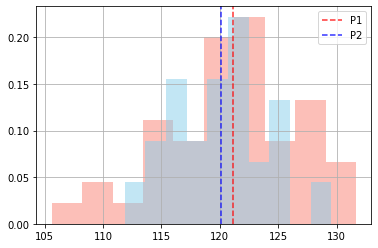

In [55]:
two_histograms(x,y,10)
# линиями отмечены медианы P1 и P2

Увеличим количество столбцов, чтобы понять, что перед нами не идеальные нормальные распределения

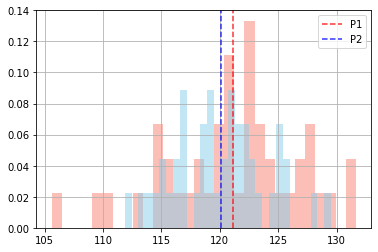

In [47]:
two_histograms(x,y,30)

Распределения похожи на нормальные, существенных отклонений от нормальности нет

являются ли различия статистически значимыми?

#### Нулевая гипотеза: различия НЕ ЯВЛЯЮТСЯ статистически значимыми, простым языком "равны"

#### Альтернативная гипотеза: различия ЯВЛЯЮТСЯ статистически значимымиБ "не равны"

Если бы мы подумали, что распределения величин не являются нормальными, мы бы использовали критерий Манна-Уитни, но если все впорядке, будем исвпользовать критерий Стьюдента, для этого в python есть процедура из библиотеки stats под названием ttest_rel

#### Документация   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
scipy.stats.ttest_rel 
scipy.stats.ttest_rel(a , b)
Рассчитайте критерий Стьюдента на ДВУХ СВЯЗАННЫХ выборках баллов a и b.

Это двусторонний тест для нулевой гипотезы о том, что 2 связанных или повторных образца имеют идентичные средние (ожидаемые) значения.

#### Можно ли с надежностью 95% утверждать, что давления можно считать равными, отличия статистически не значимы?

Возьмем порог значимости 0.05

если критерий Стьюдента, p-value будет больше 0.05, то гипотеза подтвердится и мы сделаем вывод, что отличия статистически не значимы

In [54]:
res = stats.ttest_rel(x,y)
print('p-value: ', res[1])

p-value:  0.34037133115984175


p-value получилось достаточно большим, поэтому у нас нет оснований отвергнуть гипотезу

### Вывод: замеры различаются незначимо, разница медиан в выборках случайна